#### Plotting MPAS with Uxarray Matplotlib
create visualizations using Matplotlib by converting UXarray objects into compatible Matplotlib collections

From Michael Duda:
https://www2.mmm.ucar.edu/projects/mpas/tutorial/Howard2024/
 atm_cells_labels_new.ncl

Ming Ge Feb 2025

In [1]:
import uxarray as ux
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [16]:
dir_data = "/glade/derecho/scratch/duda/mpas_tutorial/240-48km_variable/"

flnm_grid = dir_data + "SouthAmerica.init.nc"
flnm_data = dir_data + "diag.2014-09-11_00.00.00.nc"
print(flnm_grid)

uxds_mpas = ux.open_dataset(flnm_grid, flnm_grid)

# for terrain height
uxda = uxds_mpas.ter
uxda.long_name, uxda.units

/glade/derecho/scratch/duda/mpas_tutorial/240-48km_variable/SouthAmerica.init.nc


('terrain height', 'm')

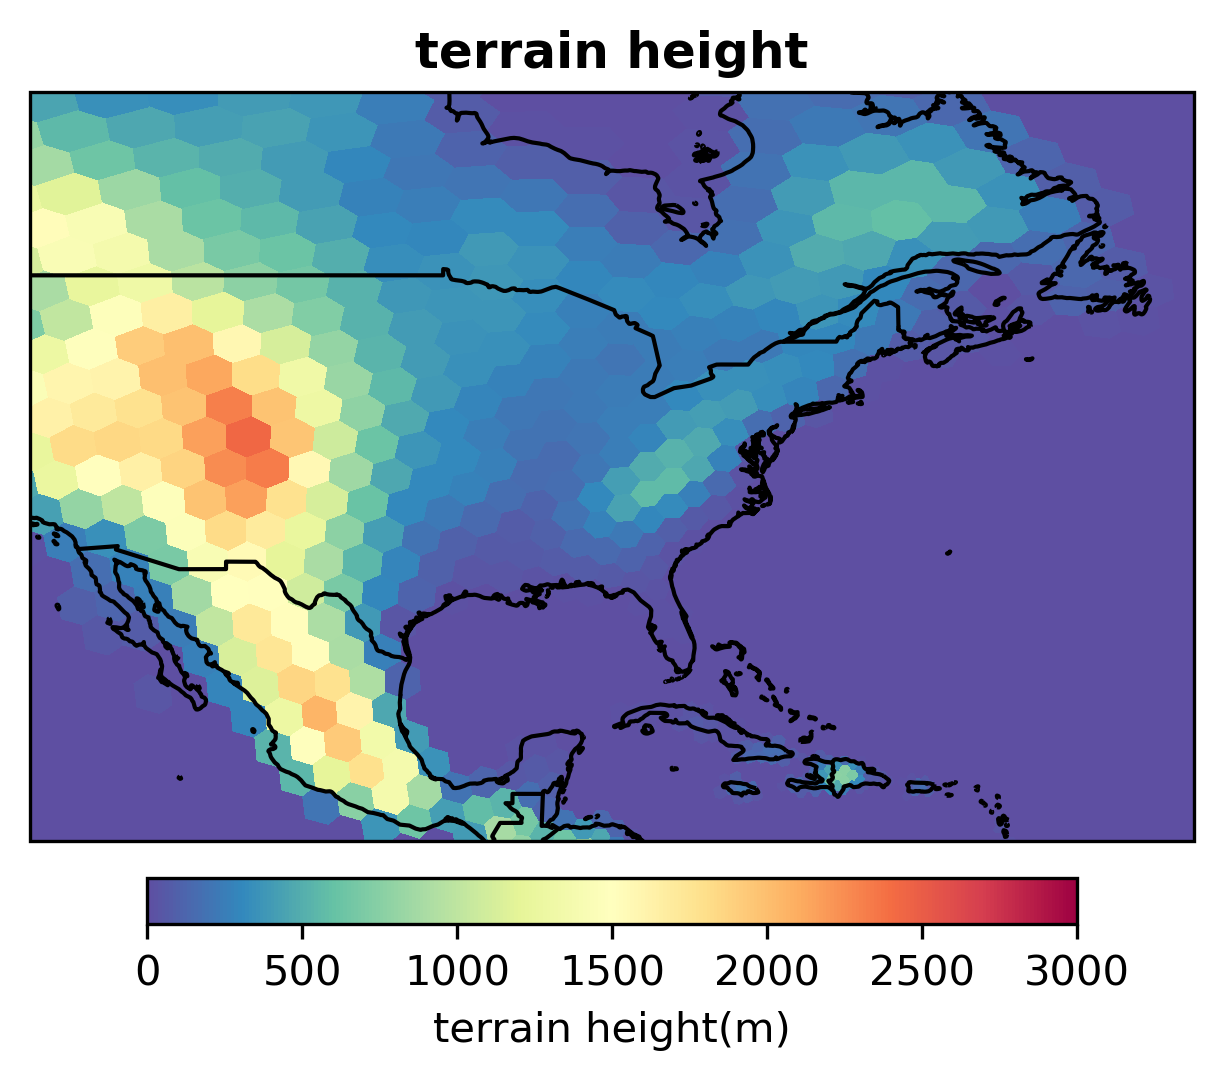

In [21]:
pc = uxda.to_polycollection(periodic_elements="split")
# disables grid lines
pc.set_antialiased(False)

pc.set_cmap("Spectral_r")
pc.set_clim(0,3000)

fig, ax = plt.subplots(1, 1, figsize=(8, 4),  dpi=300,
    subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# bounding box
ax.set_xlim((-120, -50))
ax.set_ylim((15, 60))

ax.add_collection(pc)
#cbar = plt.colorbar(pc, orientation='horizontal', pad=0.05, shrink=0.6)
cbar = plt.colorbar(pc, orientation='horizontal', pad=0.04, shrink=0.5) 
 
# Set the colorbar title
cbar.set_label(uxda.long_name + '(' + uxda.units + ')',  fontsize=10)
plt.title(uxda.long_name, fontweight="bold");


#### For Comparison: plot from original NCL

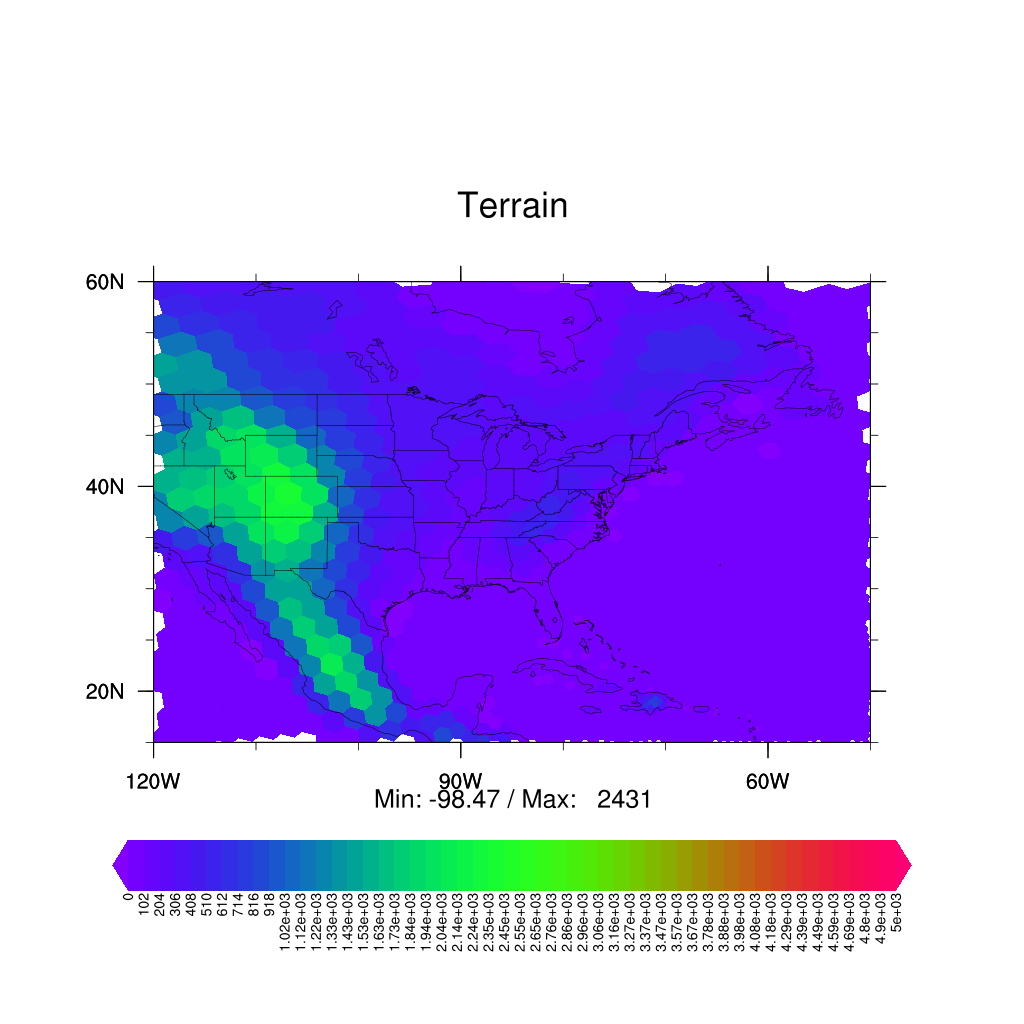

In [26]:
from IPython.display import Image

fig = Image(filename=('/glade/u/home/mingge/NCL_2_PYTHON/atm_cells_labels.png'))
fig